In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# compression part

importing dataset

In [ ]:
from keras.datasets import fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()
# Normalize the pixel values to be between 0 and 1
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

4422102/4422102 [==============================] - 1s 0us/step


creating AE

In [ ]:
latent_space_size = 100

#encode part
inputs = keras.Input(shape = (28, 28))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(latent_space_size, activation = 'relu')(x)

#decode part
x = keras.layers.Dense(28*28, activation = 'relu')(x)
outputs = keras.layers.Reshape((28, 28))(x)

AE = keras.Model(inputs = inputs, outputs = outputs)
print(AE.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 784)               79184     
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size = 256
epochs = 10
AE.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam")
AE.fit(xtrain, xtrain, batch_size=batch_size, epochs=epochs, validation_data = (xtest, xtest))# different between original and compressed image

Epoch 1/10
235/235 [==============================] - 2s 4ms/step - loss: 0.0101 - val_loss: 0.0100
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 0.0100
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0098 - val_loss: 0.0100

In [ ]:
compressed_train_imgs = AE.predict(xtrain)

1875/1875 [==============================] - 3s 1ms/step


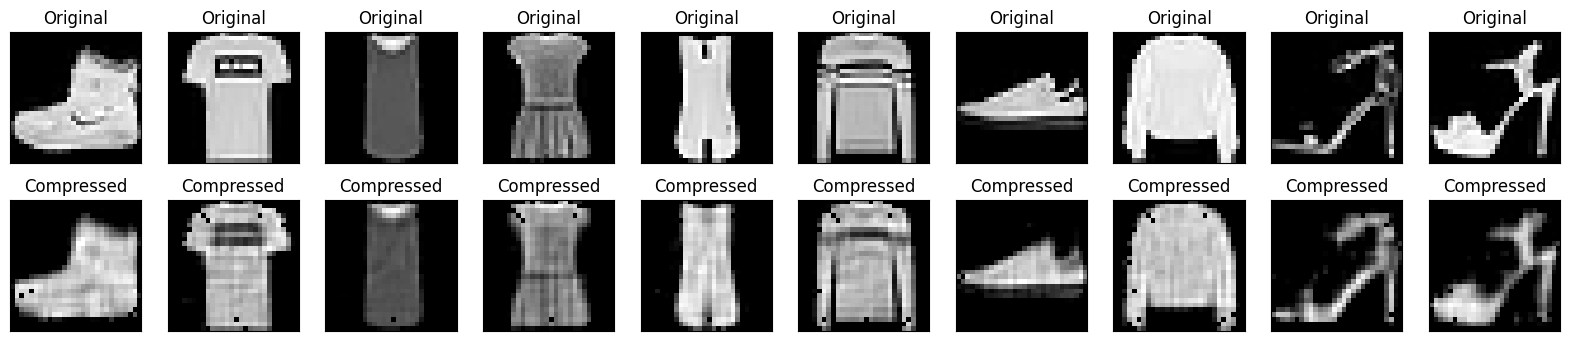

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtrain[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(compressed_train_imgs[i].reshape(28, 28))
    plt.title('Compressed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# denosing part

In [ ]:
from keras.datasets import fashion_mnist
import tensorflow as tf
(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()
# Normalize the pixel values to be between 0 and 1
xtrain = xtrain.astype('float32') / 255.0
xtest = xtest.astype('float32') / 255.0

xtrain = xtrain.reshape(-1, 28, 28, 1)
xtest = xtest.reshape(-1, 28, 28, 1)


noise_factor = 0.2
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape = xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape = xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy, clip_value_max = 1, clip_value_min = 0).numpy()
xtest_noisy = tf.clip_by_value(xtest_noisy, clip_value_max = 1, clip_value_min = 0).numpy()

plotting noisy images

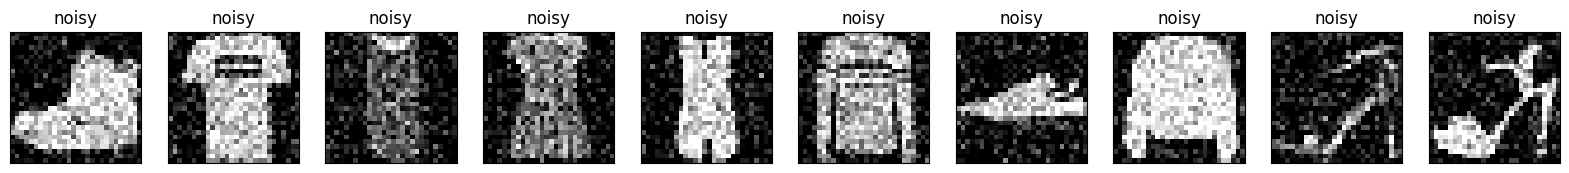

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(xtrain_noisy[i].reshape(28, 28))
    plt.title('noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#encode part
inputs = keras.Input(shape = (28, 28, 1))
x = keras.layers.Conv2D(16, (3, 3), activation = 'relu', strides = 2, padding = 'same')(inputs)
x = keras.layers.Conv2D(32, (3, 3), activation = 'relu', strides = 2, padding = 'same')(x)

#decode part
x = keras.layers.Conv2DTranspose(32, kernel_size = 3, activation = 'relu', strides = 2, padding = 'same')(x)
x = keras.layers.Conv2DTranspose(16, kernel_size = 3, activation = 'relu', strides = 2, padding = 'same')(x)

outputs = keras.layers.Conv2D(1, (3, 3), activation = 'relu', padding = 'same')(x)

AE = keras.Model(inputs = inputs, outputs = outputs)
print(AE.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       9248      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 16)       4624      
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         145   

In [ ]:
batch_size = 256
epochs = 10
AE.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam")
AE.fit(xtrain_noisy, xtrain, batch_size=batch_size, epochs=epochs, validation_data = (xtest_noisy, xtest))# different between original and compressed image

Epoch 1/10
235/235 [==============================] - 14s 10ms/step - loss: 0.0293 - val_loss: 0.0105
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0077 - val_loss: 0.0074
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 5/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0068 - val_loss: 0.0066
Epoch 6/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0061 - val_loss: 0.0061
Epoch 10/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0060 - val_loss: 0.00

In [ ]:
denoised_train_imgs = AE.predict(xtrain_noisy)

1875/1875 [==============================] - 4s 2ms/step


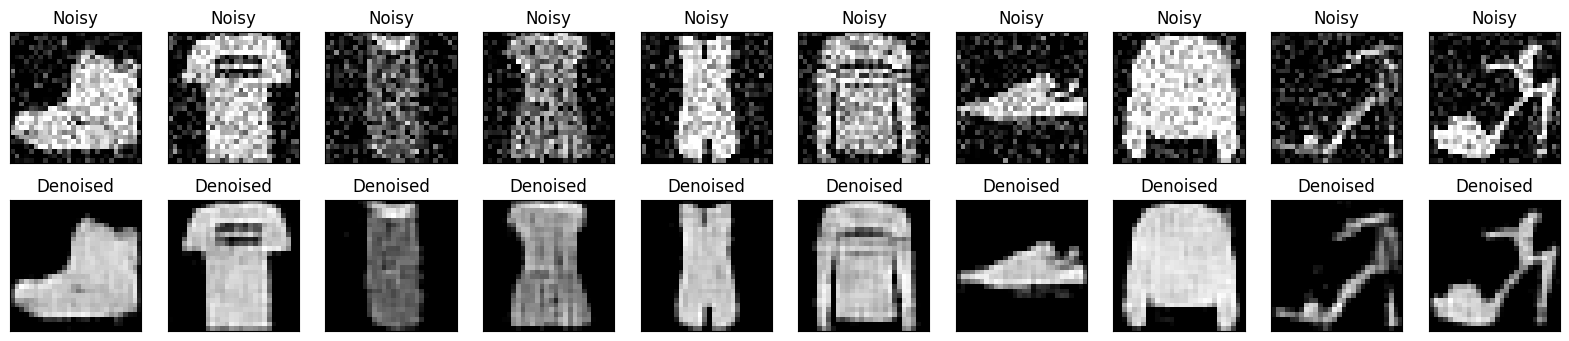

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtrain_noisy[i].reshape(28, 28))
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_train_imgs[i].reshape(28, 28))
    plt.title('Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# what if we use compressed images as noisy images?

In [ ]:
compressed_train_imgs.shape

(60000, 28, 28)

In [ ]:
denoised_compressed_imgs = AE.predict(compressed_train_imgs.reshape(-1,28,28,1))

1875/1875 [==============================] - 4s 2ms/step


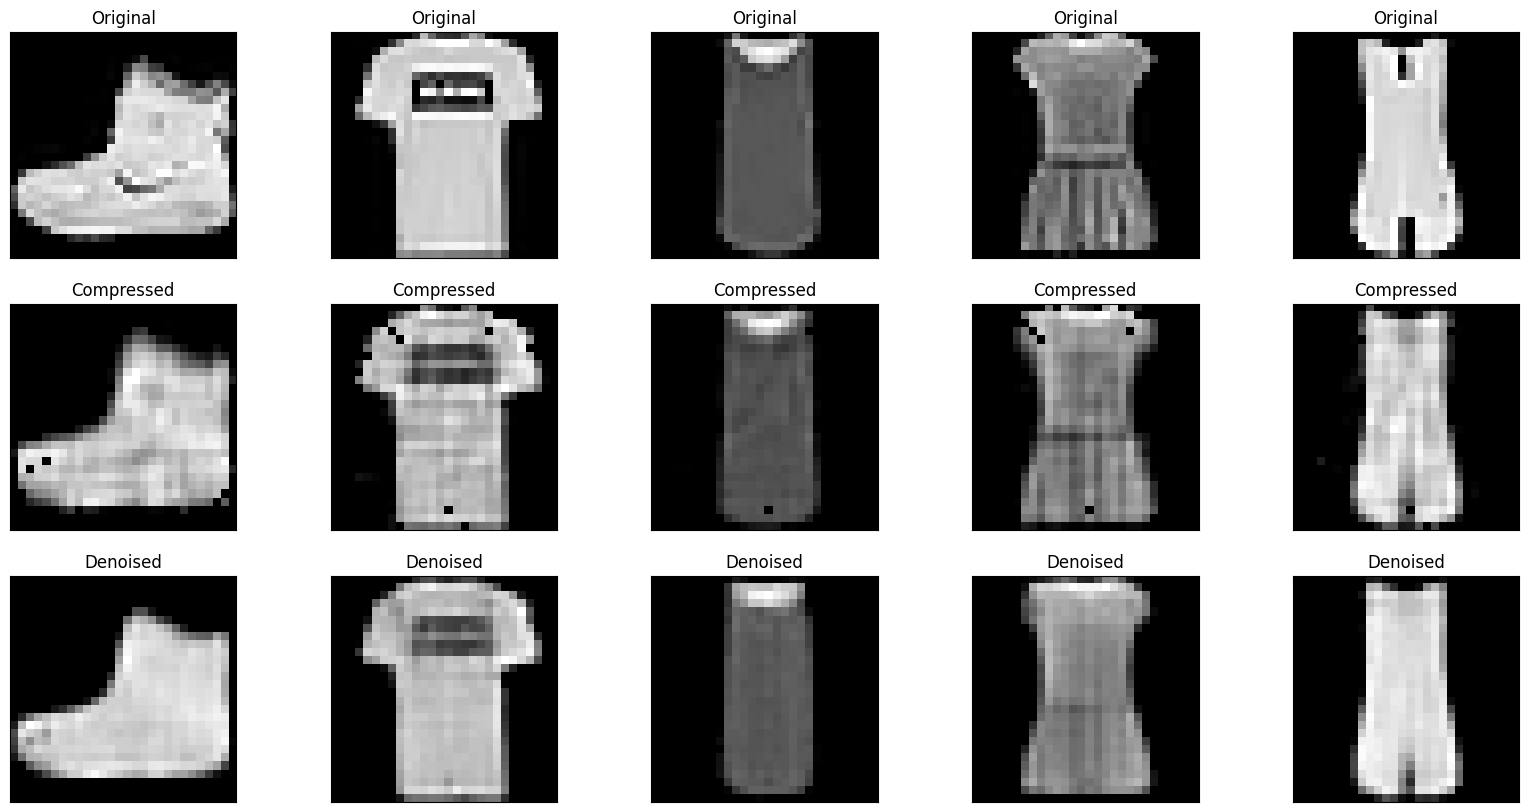

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(xtrain[i].reshape(28, 28))
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(compressed_train_imgs[i].reshape(28, 28))
    plt.title('Compressed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Denoised images from compressed ones
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_compressed_imgs[i].reshape(28, 28))
    plt.title('Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# what if we just pass a random noise to denoising model?

In [ ]:
random_noises = tf.random.normal(shape = (10, 28, 28, 1))
random_noises = tf.clip_by_value(random_noises, clip_value_max = 1, clip_value_min = 0).numpy()

In [ ]:
denoised_random_noises_1 = AE.predict(random_noises)
denoised_random_noises_2 = AE.predict(denoised_random_noises_1)
denoised_random_noises_3 = AE.predict(denoised_random_noises_2)
denoised_random_noises_4 = AE.predict(denoised_random_noises_3)

1/1 [==============================] - 0s 21ms/step


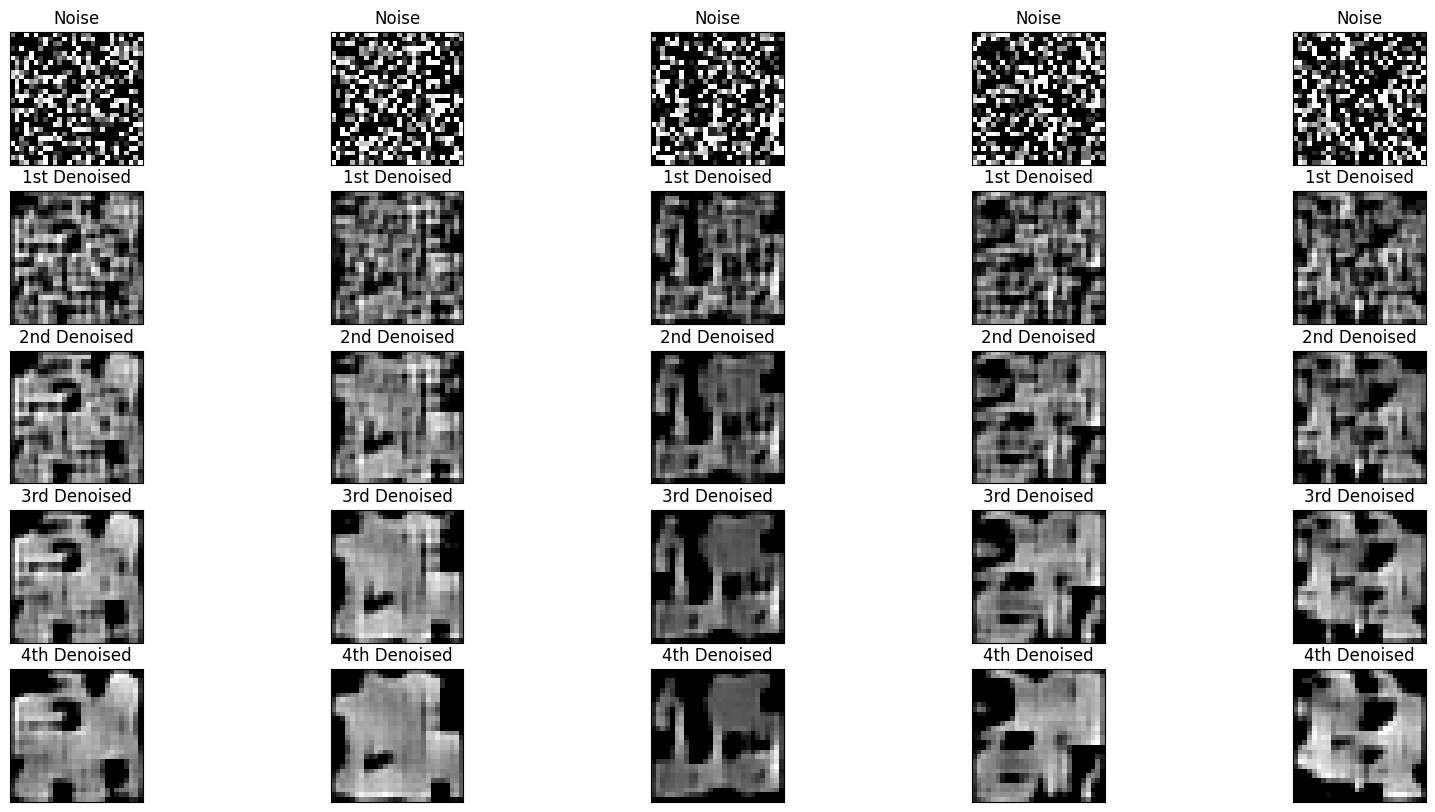

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
    # Original images
    ax = plt.subplot(5, n, i + 1)
    plt.imshow(random_noises[i].reshape(28, 28))
    plt.title('Noise')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(5, n, i + 1 + n)
    plt.imshow(denoised_random_noises_1[i].reshape(28, 28))
    plt.title('1st Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Denoised images from compressed ones
    ax = plt.subplot(5, n, i + 1 + 2 * n)
    plt.imshow(denoised_random_noises_2[i].reshape(28, 28))
    plt.title('2nd Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5, n, i + 1 + 3 * n)
    plt.imshow(denoised_random_noises_3[i].reshape(28, 28))
    plt.title('3rd Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5, n, i + 1 + 4 * n)
    plt.imshow(denoised_random_noises_4[i].reshape(28, 28))
    plt.title('4th Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Lets Denoise random noises for some iterations!

In [ ]:
iterations = 8
result_of_noises = random_noises
for i in range(iterations):
  result_of_noises = AE.predict(result_of_noises)

1/1 [==============================] - 0s 19ms/step


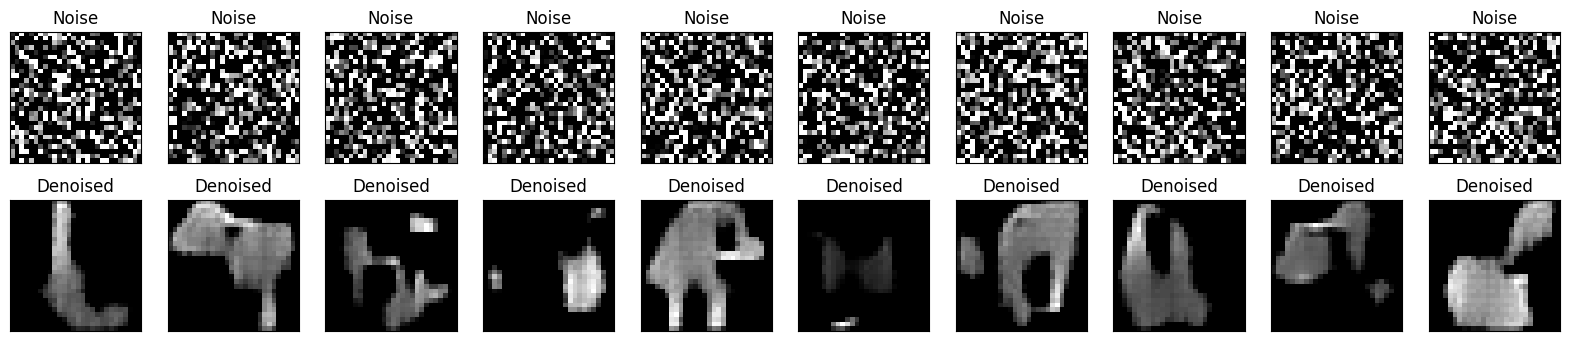

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(random_noises[i].reshape(28, 28))
    plt.title('Noise')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_of_noises[i].reshape(28, 28))
    plt.title('Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

increasing noise rate

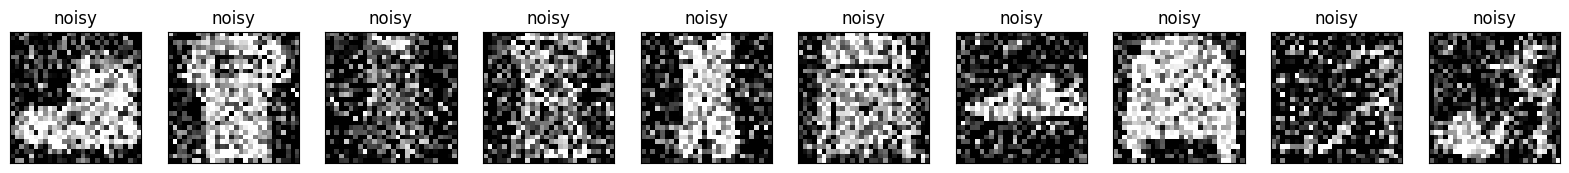

In [ ]:
noise_factor = 0.4
xtrain_noisy = xtrain + noise_factor * tf.random.normal(shape = xtrain.shape)
xtest_noisy = xtest + noise_factor * tf.random.normal(shape = xtest.shape)

xtrain_noisy = tf.clip_by_value(xtrain_noisy, clip_value_max = 1, clip_value_min = 0).numpy()
xtest_noisy = tf.clip_by_value(xtest_noisy, clip_value_max = 1, clip_value_min = 0).numpy()

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(xtrain_noisy[i].reshape(28, 28))
    plt.title('noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
denoised_random_noises_1 = AE.predict(xtrain_noisy)
denoised_random_noises_2 = AE.predict(denoised_random_noises_1)
denoised_random_noises_3 = AE.predict(denoised_random_noises_2)
denoised_random_noises_4 = AE.predict(denoised_random_noises_3)

1875/1875 [==============================] - 3s 2ms/step


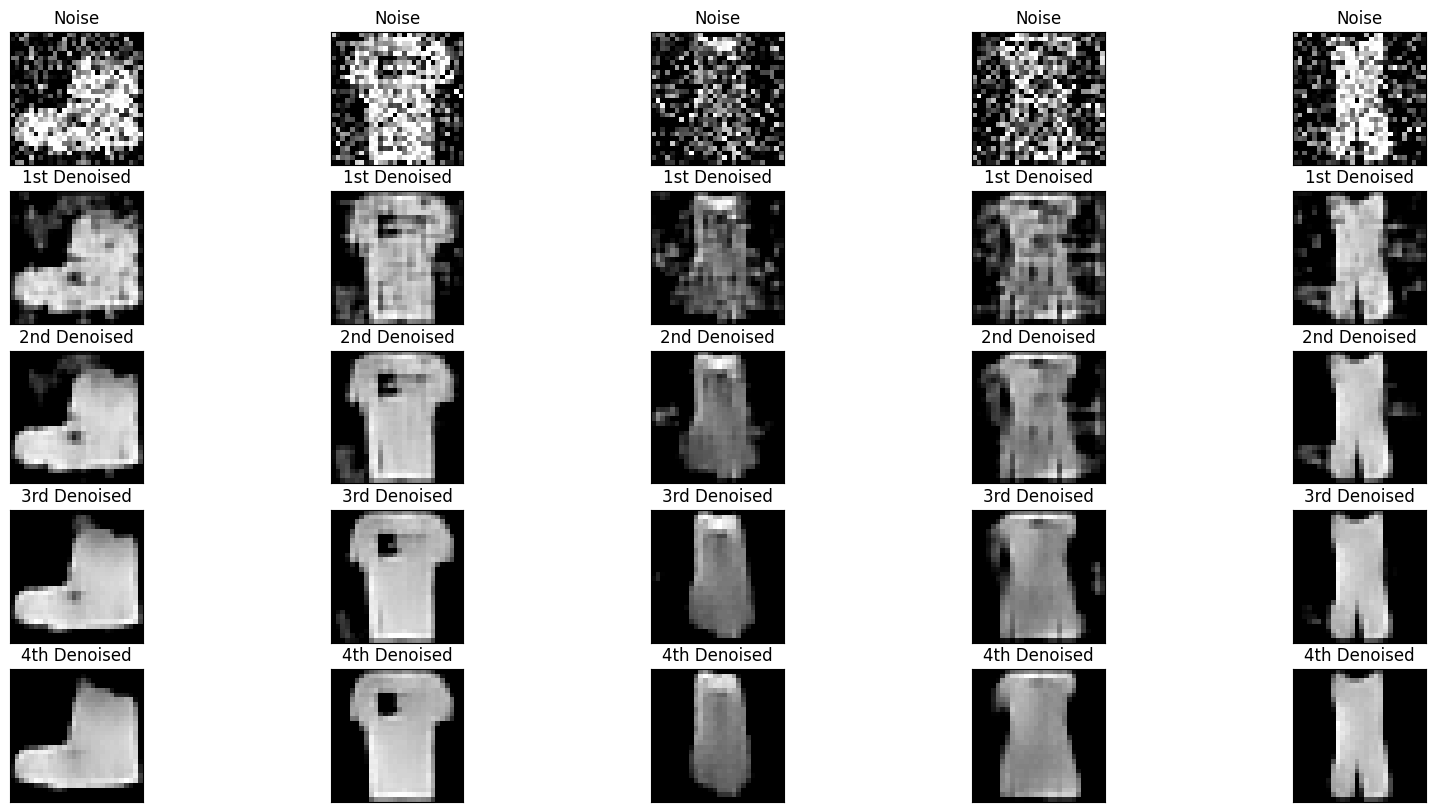

In [ ]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
    # Original images
    ax = plt.subplot(5, n, i + 1)
    plt.imshow(xtrain_noisy[i].reshape(28, 28))
    plt.title('Noise')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(5, n, i + 1 + n)
    plt.imshow(denoised_random_noises_1[i].reshape(28, 28))
    plt.title('1st Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Denoised images from compressed ones
    ax = plt.subplot(5, n, i + 1 + 2 * n)
    plt.imshow(denoised_random_noises_2[i].reshape(28, 28))
    plt.title('2nd Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5, n, i + 1 + 3 * n)
    plt.imshow(denoised_random_noises_3[i].reshape(28, 28))
    plt.title('3rd Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(5, n, i + 1 + 4 * n)
    plt.imshow(denoised_random_noises_4[i].reshape(28, 28))
    plt.title('4th Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# lets train Denoiser on random noises

In [ ]:
train_noise = tf.random.normal(shape = xtrain.shape)
train_noise = tf.clip_by_value(train_noise, clip_value_max = 1, clip_value_min = 0).numpy()

batch_size = 256
epochs = 10
AE.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam")
AE.fit(xtrain_noisy, xtrain, batch_size=batch_size, epochs=epochs, validation_data = (xtest_noisy, xtest))# different between original and compressed image

Epoch 1/10
235/235 [==============================] - 4s 9ms/step - loss: 0.0150 - val_loss: 0.0141
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0134 - val_loss: 0.0134
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0132 - val_loss: 0.0132
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0131 - val_loss: 0.0132
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.0131
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0130 - val_loss: 0.0131
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0129 - val_loss: 0.0130

lets see the result for random noises again

In [ ]:
iterations = 2
result_of_noises = random_noises
for i in range(iterations):
  result_of_noises = AE.predict(result_of_noises)

1/1 [==============================] - 0s 19ms/step


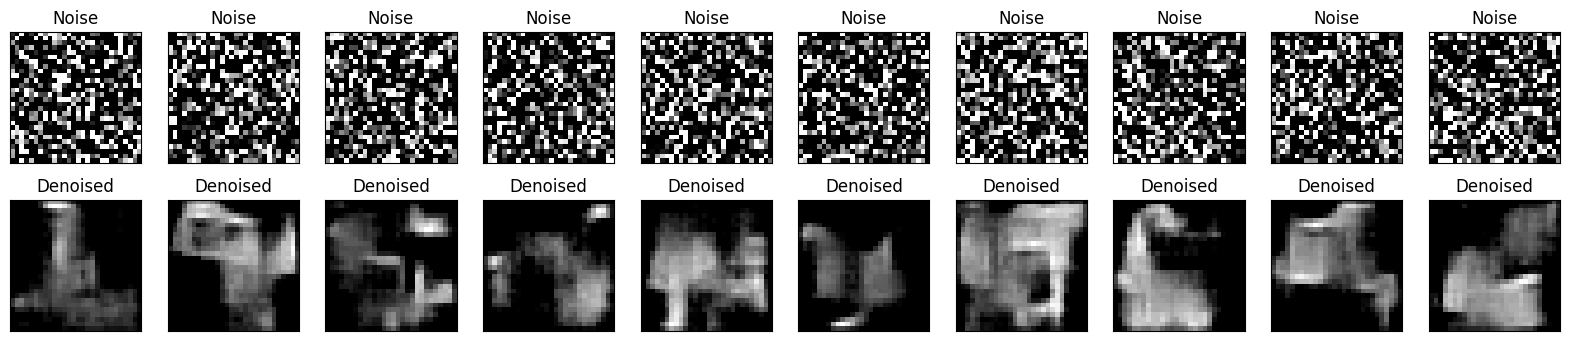

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(random_noises[i].reshape(28, 28))
    plt.title('Noise')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(result_of_noises[i].reshape(28, 28))
    plt.title('Denoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()